In [1]:
"""
    -*- coding: utf-8 -*-
    @Time   :2022/04/12 17:10
    @Author : Pengyou FU
    @blogs  : https://blog.csdn.net/Echo_Code?spm=1000.2115.3001.5343
    @github : https://github.com/FuSiry/OpenSA
    @WeChat : Fu_siry
    @License：Apache-2.0 license

"""


from time import sleep
import numpy as np
from sklearn.model_selection import train_test_split
from DataLoad.DataLoad import SetSplit, LoadNirtest
from Preprocessing.Preprocessing import Preprocessing
from WaveSelect.WaveSelcet import SpctrumFeatureSelcet
# from Plot.SpectrumPlot import plotspc
# from Plot.SpectrumPlot import ClusterPlot
from Simcalculation.SimCa import Simcalculation
from Clustering.Cluster import Cluster
from Regression.Rgs import QuantitativeAnalysis
from Classification.Cls import QualitativeAnalysis
from lazypredict.Supervised import LazyClassifier
from lazypredict.Supervised import LazyRegressor
import airpls
import matplotlib.pyplot as plt#导入强大的绘图库



In [2]:
#光谱聚类分析
def SpectralClusterAnalysis(data, label, ProcessMethods, FslecetedMethods, ClusterMethods):
    """
     :param data: shape (n_samples, n_features), 光谱数据
     :param label: shape (n_samples, ), 光谱数据对应的标签(理化性质)
     :param ProcessMethods: string, 预处理的方法, 具体可以看预处理模块
     :param FslecetedMethods: string, 光谱波长筛选的方法, 提供UVE、SPA、Lars、Cars、Pca
     :param ClusterMethods : string, 聚类的方法，提供Kmeans聚类、FCM聚类
     :return: Clusterlabels: 返回的隶属矩阵

     """
    ProcesedData = Preprocessing(ProcessMethods, data)
    FeatrueData, _ = SpctrumFeatureSelcet(FslecetedMethods, ProcesedData, label)
    Clusterlabels = Cluster(ClusterMethods, FeatrueData)
    #ClusterPlot(data, Clusterlabels)
    return Clusterlabels

# 光谱定量分析
def SpectralQuantitativeAnalysis(data, label, ProcessMethods, FslecetedMethods, SetSplitMethods, model):

    """
    :param data: shape (n_samples, n_features), 光谱数据
    :param label: shape (n_samples, ), 光谱数据对应的标签(理化性质)
    :param ProcessMethods: string, 预处理的方法, 具体可以看预处理模块
    :param FslecetedMethods: string, 光谱波长筛选的方法, 提供UVE、SPA、Lars、Cars、Pca
    :param SetSplitMethods : string, 划分数据集的方法, 提供随机划分、KS划分、SPXY划分
    :param model : string, 定量分析模型, 包括ANN、PLS、SVR、ELM、CNN、SAE等，后续会不断补充完整
    :return: Rmse: float, Rmse回归误差评估指标
             R2: float, 回归拟合,
             Mae: float, Mae回归误差评估指标
    """
    # 要看效果好不好，如果效果不好，就不去基线了
    # for i in range(data.shape[0]):
    #     data[i] = airpls.airPLS_deBase(data[i])
    # print("-----------去基线成功----------------")
    ProcesedData = Preprocessing(ProcessMethods, data)
    FeatrueData, labels = SpctrumFeatureSelcet(FslecetedMethods, ProcesedData, label)
    # print("---------------------------------------")
    # print(FeatrueData.shape)
    # print(labels.shape)
    # print("---------------------------------------")

    # sleep(100)
    # 将特征值从很多很多降到了固定的 x个               def Pca(X, nums=20):
    X_train, X_test, y_train, y_test = SetSplit(SetSplitMethods, FeatrueData, labels, test_size=0.2, randomseed=123)
    # reg = LazyRegressor(ignore_warnings=False, custom_metric=None)
    # models, predictions = reg.fit(X_train, X_test, y_train, y_test)
    # print(models)
    # best_model = models.iloc[0]
    Rmse, R2, Mae = QuantitativeAnalysis(model, X_train, X_test, y_train, y_test ) 
    # model.save('model_savedmodel', save_format='tf')  
    return Rmse, R2, Mae

# 光谱定性分析
def SpectralQualitativeAnalysis(data, label, ProcessMethods, FslecetedMethods, SetSplitMethods, model):

    """
    :param data: shape (n_samples, n_features), 光谱数据
    :param label: shape (n_samples, ), 光谱数据对应的标签(理化性质)
    :param ProcessMethods: string, 预处理的方法, 具体可以看预处理模块
    :param FslecetedMethods: string, 光谱波长筛选的方法, 提供UVE、SPA、Lars、Cars、Pca
    :param SetSplitMethods : string, 划分数据集的方法, 提供随机划分、KS划分、SPXY划分
    :param model : string, 定性分析模型, 包括ANN、PLS_DA、SVM、RF、CNN、SAE等，后续会不断补充完整
    :return: acc： float, 分类准确率
    """

    ProcesedData = Preprocessing(ProcessMethods, data)
    FeatrueData, labels = SpctrumFeatureSelcet(FslecetedMethods, ProcesedData, label)
    X_train, X_test, y_train, y_test = SetSplit(SetSplitMethods, FeatrueData, labels, test_size=0.2, randomseed=123)
    acc = QualitativeAnalysis(model, X_train, X_test, y_train, y_test )
    # model.save('model_savedmodel', save_format='tf')  
    
    return acc









In [5]:


if __name__ == '__main__':

    # ## 载入原始数据并可视化
    # data1, label1 = LoadNirtest('Cls')
    # #plotspc(data1, "raw specturm")
    # # 光谱定性分析演示
    # # 示意1: 预处理算法:MSC , 波长筛选算法: 不使用, 全波长建模, 数据集划分:随机划分, 定性分析模型: RF
    # acc = SpectralQualitativeAnalysis(data1, label1, "MSC", "Lars", "random", "PLS_DA")
    # print("The acc:{} of result!".format(acc))
    mode ="dingliang"
    if(mode=="dingliang"):
    ## 载入原始数据并可视化
    # 光谱定量分析演示
    # 示意1: 预处理算法:MSC , 波长筛选算法: Uve, 数据集划分:KS, 定性分量模型: SVR
        data2, label2 = LoadNirtest('Rgs')
        print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")  
        print(data2.shape)
        print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
        print("yyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyy")
        print(label2.shape) 
        print("yyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyy")
        # for  i,element in enumerate(data2):
        #     if(i==5): break
        #     else:
        #         plt.plot([i for i in range(len(element))],element)
                 
        # # RMSE, R2, MAE = SpectralQuantitativeAnalysis(data2, label2, "SG", "None", "ks", "CNN")
        # RMSE, R2, MAE = SpectralQuantitativeAnalysis(data2, label2, "SG", "None", "ks", "CNN")
        RMSE, R2, MAE = SpectralQuantitativeAnalysis(data2, label2, "SG", "None", "ks", "SVR")

        print("The Pca RMSE:{} R2:{}, MAE:{} of result!".format(RMSE, R2, MAE))
    else:
        data1, label1 = LoadNirtest('Cls')
        acc = SpectralQualitativeAnalysis(data1, label1, "SNV", "None", "random", "ANN")
        print("The acc:{} of result!".format(acc))







xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
(655, 649)
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
yyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyy
(655, 2)
yyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyy
The Pca RMSE:6.877878077468966 R2:-2.467305164558846, MAE:4.486753560951352 of result!


In [4]:
from sklearn.preprocessing import MinMaxScaler
# 创建MinMaxScaler对象
scaler = MinMaxScaler()
# 将数据进行归一化
List_Data_Scaler=[]
for  i,element in enumerate(data2):
    meantemp = scaler.fit_transform(data2[i].reshape(-1,1))
   
    meantemp = scaler.inverse_transform(meantemp)
    List_Data_Scaler.append(meantemp)

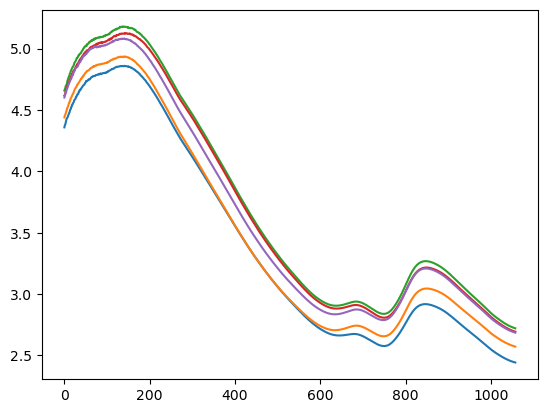

In [5]:
for  i,element in enumerate(List_Data_Scaler):
    if(i==5): break
    else:
        plt.plot([i for i in range(len(element))],element)

In [6]:
X_numpy_arr = np.array(List_Data_Scaler)
Y_numpy_arr = np.array(label2)

In [7]:
# 定义LSTM模型类
import torch#一个深度学习的库Pytorch
import torch.nn as nn#neural network,神经网络
import torch.optim as optim#一个实现了各种优化算法的库
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        h0 = torch.zeros(self.num_layers,x.size(0), self.hidden_size) # 初始化隐藏状态h0
        c0 = torch.zeros(self.num_layers,x.size(0), self.hidden_size)  # 初始化记忆状态c0
        #print(f"x.shape:{x.shape},h0.shape:{h0.shape},c0.shape:{c0.shape}")
        out, _ = self.lstm(x, (h0, c0))  # LSTM前向传播
        out = self.fc(out[:, -1, :])  # 取最后一个时间步的输出作为预测结果
        return out

In [8]:
#设置随机种子
import random
torch.backends.cudnn.deterministic = True#将cudnn框架中的随机数生成器设为确定性模式
torch.backends.cudnn.benchmark = False#关闭CuDNN框架的自动寻找最优卷积算法的功能，以避免不同的算法对结果产生影响
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

In [9]:
test_X =X_numpy_arr
test_y =Y_numpy_arr

In [10]:
FeatrueData, labels = SpctrumFeatureSelcet("None", test_X, test_y)
X_train, X_test, y_train, y_test = SetSplit("random", FeatrueData, labels, test_size=0.2, randomseed=123)


In [11]:
print(X_train.shape)
print(y_train.shape)

(396, 1058, 1)
(396, 2)


In [12]:

test_X1=torch.Tensor(X_test)
test_y1=torch.Tensor(y_test)
train_X=torch.Tensor(X_train)
train_y=torch.Tensor(y_train)
# X_train, X_test, y_train, y_test = SetSplit("random", FeatrueData, labels, test_size=0.2, randomseed=123)


# 定义输入、隐藏状态和输出维度
input_size = 1  # 输入特征维度
hidden_size = 64  # LSTM隐藏状态维度
num_layers = 5  # LSTM层数
output_size = 1  # 输出维度（预测目标维度）

# 创建LSTM模型实例
model = LSTMModel(input_size, hidden_size, num_layers, output_size)

#训练周期为500次
num_epochs=500
batch_size=64#一次训练的数量
#优化器
optimizer=optim.Adam(model.parameters(),lr=0.0001,betas=(0.5,0.999))
#损失函数
criterion=nn.MSELoss()

train_losses=[]
test_losses=[]

print(f"start")

for epoch in range(num_epochs):
    
    random_num=[i for i in range(len(train_X))]
    np.random.shuffle(random_num)
    
    train_X=train_X[random_num]
    train_y=train_y[random_num]
    
    train_X1=torch.Tensor(train_X[:batch_size])
    train_y1=torch.Tensor(train_y[:batch_size])
    
    #训练
    model.train()
    #将梯度清空
    optimizer.zero_grad()
    #将数据放进去训练
    output=model(train_X1)
    #计算每次的损失函数
    train_loss=criterion(output,train_y1)
    #反向传播
    train_loss.backward()
    #优化器进行优化(梯度下降,降低误差)
    optimizer.step()
    
    if epoch%2==0:
        model.eval()
        with torch.no_grad():
            output=model(test_X1)
            test_loss=criterion(output,test_y1)
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        print(f"epoch:{epoch},train_loss:{train_loss},test_loss:{test_loss}")

start
epoch:0,train_loss:6.192606449127197,test_loss:6.429715156555176
epoch:2,train_loss:6.1901326179504395,test_loss:6.399701118469238
epoch:4,train_loss:6.303155899047852,test_loss:6.369341850280762
epoch:6,train_loss:6.271815299987793,test_loss:6.338627338409424
